In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append("./coco/PythonAPI")
from pycocotools.coco import COCO
coco = COCO("./annotations/instances_train2014.json")

loading annotations into memory...
Done (t=56.14s)
creating index...
index created!


In [2]:
catIds = coco.getCatIds(catNms=['person']) # type: List[int]
cats = coco.loadCats(catIds) # type: List[dict]
imgIds = coco.getImgIds(catIds=catIds) # type: List[int]
imgs = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))]) # type: List[dict]

{'date_captured': '2013-11-18 04:54:29', 'id': 154171, 'height': 640, 'flickr_url': 'http://farm4.staticflickr.com/3559/3815030925_c70c8e9fe8_z.jpg', 'file_name': 'COCO_train2014_000000154171.jpg', 'license': 7, 'width': 433, 'coco_url': 'http://mscoco.org/images/154171'} (640, 433, 3) uint8


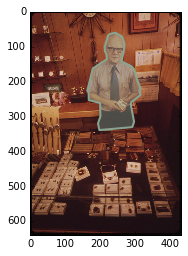

In [3]:
img = imgs[0] # type: dict
import skimage.io as io
I = io.imread('http://mscoco.org/images/%d' % (img['id']) ) # type: np.ndarray
print(img, I.shape, I.dtype)
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None) # type: List[int]
anns = coco.loadAnns(annIds) # type: List[dict]
coco.showAnns(anns)

(640, 433) uint8


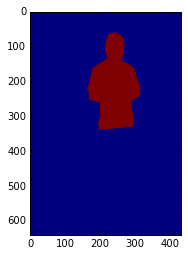

In [4]:
from pycocotools import mask
ann = anns[0]
rles = mask.frPyObjects(ann["segmentation"], I.shape[0], I.shape[1]) # type: List[dict]
mask_img = mask.decode(rles[0]) # type: np.ndarray
print(mask_img.shape, mask_img.dtype)
plt.imshow(mask_img)